In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 

#for accuracy and loss graph
import matplotlib.pyplot as plt

ImportError: ignored

In [ ]:
pip install bdgenomics.adam

     |████████████████████████████████| 56.7 MB 39.7 MB/s 
     |████████████████████████████████| 281.4 MB 42 kB/s 
     |████████████████████████████████| 198 kB 44.4 MB/s 
  Created wheel for bdgenomics.adam: filename=bdgenomics.adam-0.37.0-py3-none-any.whl size=56750400 sha256=001c269e07f10edfb7d24bcbccc281b2455398b6811c403a474eacb97a058e2a
  Stored in directory: /root/.cache/pip/wheels/bb/d3/7b/2a6526df9fed3b4118c0098ed06aa0ed6e7778d3e00a68d830
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=b1e540af6f78329e92bb1a212dc9df057d7090f25cb1505dcbf0dd32fdde9476
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built bdgenomics.adam pyspark


In [ ]:
pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8270 sha256=a22fe8cf90365a3519fad95de5af62962bdbc35d6d2dda70677d5975eba98d4b
  Stored in directory: /root/.cache/pip/wheels/5d/1f/40/3fe78c6f4dd6f0522c558077283361e7d50fd7720d2f8fcd7e
Successfully built keras-rectified-adam


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint 

#for accuracy and loss graph
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
train_data_path='/content/drive/MyDrive/dataset/train'
validation_data_path='/content/drive/MyDrive/dataset/test'

In [ ]:
#show augmented images
def plotImages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes= axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    plt

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=70,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3609 images belonging to 17 classes.


In [ ]:
training_data.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16}

In [ ]:

# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=70,
                                  class_mode='binary')

Found 4317 images belonging to 17 classes.


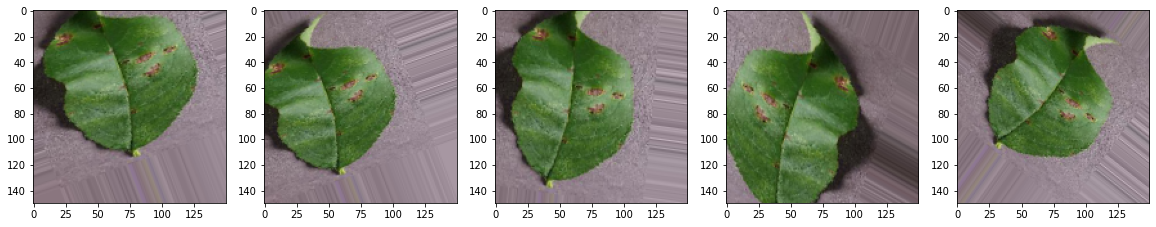

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
from sklearn.externals import joblib


In [ ]:
loaded_model = joblib.load('best_model.pkl')

FileNotFoundError: ignored

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/pl_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=17, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=300, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/300
52/52 [==============================] - 3467s 67s/step - loss: 2.6123 - accuracy: 0.2384 - val_loss: 2.1199 - val_accuracy: 0.3651

Epoch 00001: val_accuracy improved from -inf to 0.36507, saving model to /content/drive/MyDrive/pl_dis.h5
Epoch 2/300
52/52 [==============================] - 34s 663ms/step - loss: 2.0735 - accuracy: 0.3791 - val_loss: 1.9032 - val_accuracy: 0.4334

Epoch 00002: val_accuracy improved from 0.36507 to 0.43340, saving model to /content/drive/MyDrive/pl_dis.h5
Epoch 3/300
52/52 [==============================] - 34s 660ms/step - loss: 1.7399 - accuracy: 0.4693 - val_loss: 1.7371 - val_accuracy: 0.4698

Epoch 00003: val_accuracy improved from 0.43340 to 0.46977, saving model to /content/drive/MyDrive/pl_dis.h5
Epoch 4/300
52/52 [==============================] - 34s 659ms/step - loss: 1.5871 - accuracy: 0.4989 - val_loss: 1.6070 - val_accuracy: 0.5022

Epoch 00004: val_accuracy improved from 0.46977 to 0.50220, saving model to /content/drive/MyDri

In [ ]:
model_path2 = '/content/drive/MyDrive/pl_dis.h5'
cnn_model.save(model_path2)

NameError: ignored

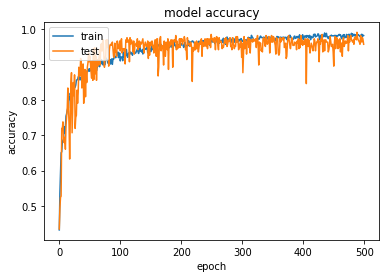

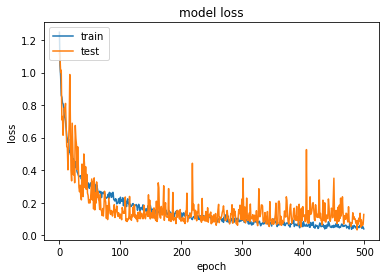

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history

{'accuracy': [0.43259868025779724,
  0.5361353158950806,
  0.588928759098053,
  0.6504356861114502,
  0.6529984474182129,
  0.6806765794754028,
  0.685802161693573,
  0.688877522945404,
  0.7237313985824585,
  0.7063044309616089,
  0.722193717956543,
  0.7539723515510559,
  0.7606355547904968,
  0.7703741788864136,
  0.7770374417304993,
  0.7765248417854309,
  0.8077908754348755,
  0.8006150722503662,
  0.8185545802116394,
  0.809328556060791,
  0.8118913173675537,
  0.8031778335571289,
  0.8298308849334717,
  0.8134289979934692,
  0.8344438672065735,
  0.8339313268661499,
  0.8354690074920654,
  0.8416196703910828,
  0.8549461960792542,
  0.8564838767051697,
  0.8569964170455933,
  0.8646847605705261,
  0.8657099008560181,
  0.8646847605705261,
  0.8559712767601013,
  0.8610968589782715,
  0.8641722202301025,
  0.8657099008560181,
  0.8733982443809509,
  0.876473605632782,
  0.8672475814819336,
  0.8805740475654602,
  0.879548966884613,
  0.8662224411964417,
  0.8651973605155945,
  0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
